<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Function Transformer
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• The FunctionTransformer is part of the sklearn.preprocessing module allowing you to wrap a user-defined function as a transformer in a pipeline.
<br>
• It is especially useful for applying mathematical transformations to datasets which can help improve model performance, stabilize variance and deal with non-normal distributions.
<br>
<br>
<strong>Parameters of FunctionTransformer</strong>
<br>
• func : A callable function to transform the data.
<br>
• inverse_func : An optional function to reverse the transformation useful for inverse transformations.
</div>

In [61]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [62]:
# Setting theme for plots
sns.set_theme("notebook")

In [63]:
# Reading CSV File
df = pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [64]:
# Null values in the DataFrame
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [65]:
# Dropping Null values from the DataFrame
df = df.dropna()

In [66]:
# Null values in the DataFrame
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Train Test Split</strong>
<br>
The train-test split is a common technique in machine learning for evaluating model performance. It involves dividing your dataset into two parts :
<br>
• Training Set : Used to train the model.
<br>
• Testing Set : Used to evaluate the model's performance on unseen data.
<br>
<br>
<strong>Parameters</strong>
<br>
• arrays : This can be a list or a tuple of arrays (e.g, features and target variables).
<br>
• test_size : Determines the proportion of the dataset to include in the test split (e.g, 0.2 for 20%).
<br>
• random_state : Controls the shuffling applied to the data before the split (e.g., any integer).
<br>
• shuffle : A boolean that indicates whether to shuffle the data before splitting.
</div>

In [67]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [68]:
# Defining Features and Target Variables
X = df[["Age","Fare"]]
y = df["Survived"]

In [69]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>QQPlot</strong>
<br>
• A Quantile-Quantile (QQ) plot is a graphical tool used to assess if a dataset follows a specified theoretical distribution, commonly the normal distribution.
<br>
• It compares the quantiles of the dataset against the quantiles of the theoretical distribution.
<br>
• If the points on the plot fall approximately along a straight line, it suggests that the data follows that distribution.
<br>
<br>
<strong>Components of a QQ Plot</strong>
<br>
• X-axis: Represents the theoretical quantiles from a specified distribution (e.g. standard normal).
<br>
• Y-axis: Represents the ordered values (empirical quantiles) of your dataset.
<br>
• Reference Line: A dashed or solid diagonal line (often y=x) that indicates where points would lie if the data perfectly followed the theoretical distribution.
<br>
<br>
<strong>How to interpret the QQ Plot</strong>
<br>
<strong>1. Points on the Line</strong>
<br>
• If points closely follow the reference line, this indicates that the data distribution closely matches the theoretical distribution (e.g., normal distribution). 
<br>
• This suggests that your data is approximately normally distributed.
<br>
<strong>2. Points above the Line</strong>
<br>
• If points lie above the reference line, it indicates that the empirical quantiles are larger than the theoretical quantiles.
<br>
• Heavy tails: The data may have more extreme high values than expected under the theoretical distribution.
<br>
• Positive skewness: The distribution may be right-skewed.
<br>
<strong>3. Points below the Line</strong>
<br>
• If points fall below the reference line, it suggests that the empirical quantiles are smaller than the theoretical quantiles.
<br>
• Light tails: The data may have fewer extreme high values than expected.
<br>
• Negative skewness: The distribution may be left-skewed.
<br>
<strong>4. Curved Patterns</strong>
<br>
• S-shaped Curve: If the points form an S-shape (concave up), this suggests that the data has heavier tails than the theoretical distribution (e.g., more outliers).
<br>
• Inverted S-shape: If the points curve in the opposite direction (concave down), it indicates lighter tails than expected.
<br>
<br>
<strong>OrderedValues</strong>
<br>
• Ordered values refer to the sorted values of a dataset.
<br>
• When you perform a QQ plot or any other statistical analysis that involves quantiles, the first step often involves sorting the data in ascending order. 
<br>
• This allows you to compare the data against a theoretical distribution or other datasets in a meaningful way.
<br>
<strong>TheoreticalQuantiles</strong>
<br>
• Theoretical quantiles are values you expect to see from a specific statistical distribution (like a normal distribution) based on the position of your data points.
<br>
<br>
<strong>How to calculate Position</strong>
<br>
• Choose a Distribution: First, you decide which theoretical distribution you want to compare your data against (e.g., normal distribution, exponential distribution).
<br>
• Sort Your Data: Order your dataset from the smallest value to the largest value. This helps identify the positions of the data points.
<br>
• Calculate Quantiles:
<br>
-> For each ordered value in your dataset, you compute the corresponding quantile from the theoretical distribution.
<br>
-> This is done by determining what proportion of the distribution lies below each data point.
<br>
-> Typically, for an ordered dataset with $n$ values, the $i$-th ordered value corresponds to the quantile :
$$q = \frac{i - 0.5}{n}$$
where 
<br>
• $i$ is the index of the ordered value (1 for the smallest, 2 for the next smallest, and so on)
<br>
• $n$ is the total number of data points
</div>

In [70]:
# Custom function to compare 
# Distribution and QQPlot for each feature
def dist_vs_qqplot(col):
    fig, ax = plt.subplots(ncols=2, figsize=(12,4))
    
    sns.histplot(X_train[col], kde=True, ax=ax[0])
    ax[0].set_title(f"Distribution of {col}")
    
    stats.probplot(X_train[col], dist="norm", plot=plt)
    ax[1].set_title(f"QQPlot of {col}")
    
    plt.show()

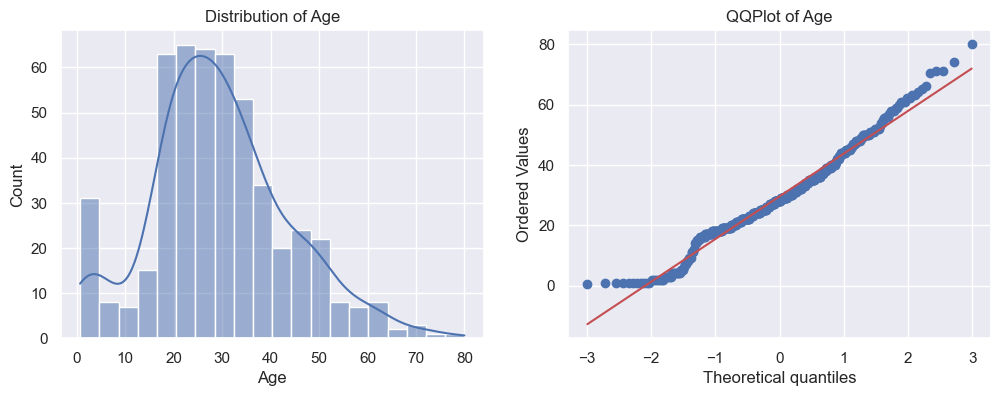

In [71]:
# For Age column
dist_vs_qqplot("Age")

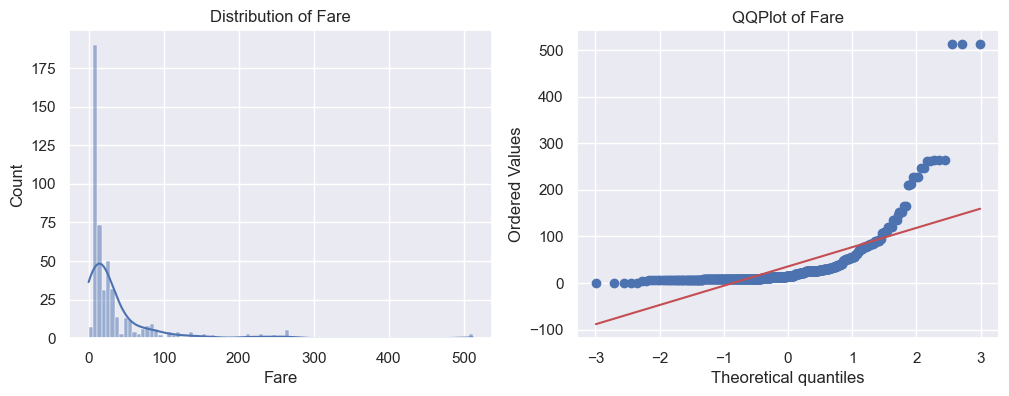

In [72]:
# For Fare column
dist_vs_qqplot("Fare")

In [73]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

In [74]:
# Creating Object for LogisticRegression
lr = LogisticRegression()

In [75]:
# Fitting data in LogisticRegression
lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
# Prediction from LogisticRegression
y_pred = lr.predict(X_test)

In [77]:
# Importing accuracy_score
from sklearn.metrics import accuracy_score

In [78]:
# accuracy_score for LogisticRegression
print("Accuracy Score of Logistic Regression :", accuracy_score(y_test, y_pred))

Accuracy Score of Logistic Regression : 0.6


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Logarithmic Transformation</strong>
<br>
• Log transformations are often applied to reduce skewness in data particularly for positively skewed distributions. 
<br>
• It can stabilize variance and make the data more normally distributed.
<br>
<br>
<strong>Mathematical Formula</strong>
<br>
• The logarithmic transformation can be expressed as : $$y=log(1+x)$$
where:
<br>
• $x$ is the original value
<br>
• The addition of 1 ensures that the transformation can handle zero values without causing undefined results
<br>
<br>
<strong>Implementation</strong>
<br>
• The logarithm is usually applied using $np.log1p(x)$ to avoid issues with $log(0)$. The log1p function computes $log(1+𝑥)$ which is numerically stable for small values (values close to 0).
</div>

In [79]:
# Importing FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

In [80]:
# Creating FunctionTransformer Object
ft = FunctionTransformer(func=np.log1p)

In [81]:
# Fitting and Transforming Training Data
X_train_transformed = ft.fit_transform(X_train)

# Transforming Testing Data
X_test_transformed = ft.transform(X_test)

In [82]:
# Fitting LogisticRegression on transformed data
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [83]:
# Prediction from LogisticRegression on transformed data
y_pred_transformed = lr.predict(X_test_transformed)

In [84]:
# accuracy_score for LogisticRegression
print("Accuracy Score of Logistic Regression on Transformed Data :", accuracy_score(y_test, y_pred_transformed))

Accuracy Score of Logistic Regression on Transformed Data : 0.6465116279069767


In [85]:
# Custom function for plotting
# QQPlot before and after transformation
def com_qqplot(col):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"QQPlot of {col} before Transformation")

    plt.subplot(1,2,2)
    stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
    plt.title(f"QQPlot of {col} after Transformation")

    plt.show()

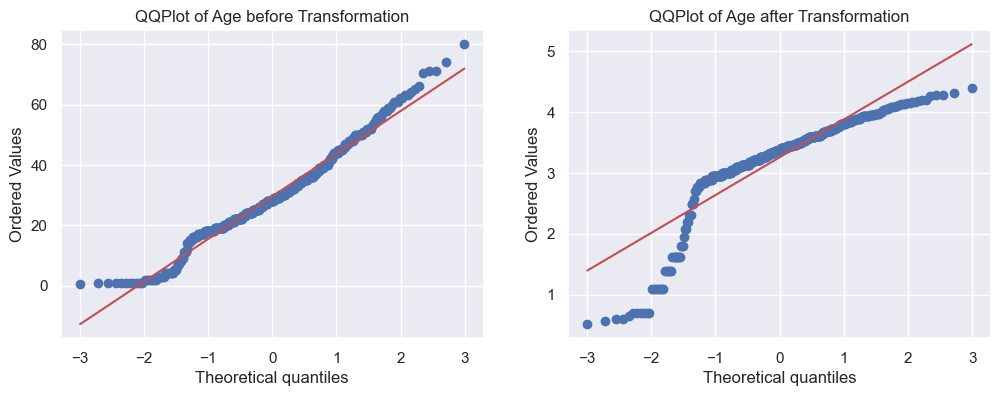

In [86]:
# For Age column
com_qqplot("Age")

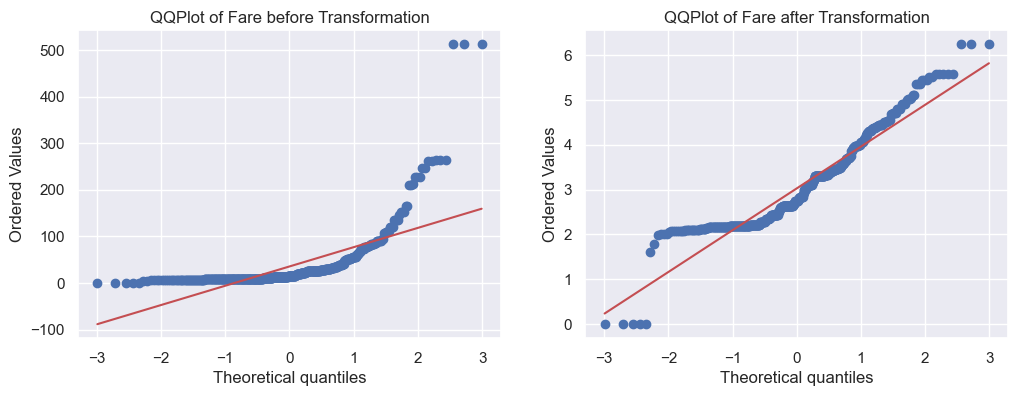

In [87]:
# For Fare column
com_qqplot("Fare")

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Reciprocal Transformation</strong>
$$y = \frac{1}{x + \epsilon}$$
where
<br>
• $y$ : Transformed value
<br>
• $x$ : Original value
<br>
• $\epsilon$ : A small constant (e.g. $1e-10$) added to avoid division by zero and to handle any zero values in the dataset.

---

<strong>Square Transformation</strong>
$$y = x^2$$
where
<br>
• $y$ is the transformed value
<br>
• $x$ is the original value

---

<strong>Square Root Transformation</strong>
$$y = \sqrt{x}$$
where
<br>
• $y$ is the transformed value
<br>
• $x$ is the original value
<br>
<br>
<strong>Use case</strong>
<br>
<strong>• Reciprocal Transformation</strong>
<br>
➩ When to Use
<br>
-> Data with a right-skewed distribution (e.g., income, time).
<br>
-> When values are positive and non-zero (as reciprocal of zero is undefined).
<br>
➩ Purpose
<br>
-> Reduces the impact of large outliers.
<br>
-> Can help in achieving linearity in regression models.
<br>
<strong>• Square Root Transformation</strong>
<br>
➩ When to Use
<br>
-> Data with moderate right skew.
<br>
➩ Purpose
<br>
-> Stabilizes variance (especially useful for heteroscedasticity).
<br>
-> Makes the distribution more normal-like.
<br>
<strong>• Square Transformation</strong>
<br>
➩ When to Use
<br>
-> Data that is left-skewed or has small values (e.g., measurements that cannot be negative).
<br>
➩ Purpose
<br>
-> Enhances the influence of larger values.
<br>
-> Can be useful in regression contexts where a quadratic relationship is expected.
</div>

In [88]:
# Importing ColumnTransformer
from sklearn.compose import ColumnTransformer

In [89]:
"""
Custom function for details of the following :
1. accuracy_score before and after transformation
2. Distribution and QQPlot before and after transformation

Parameters for function :
1. transform (any transformation to be applied, like log_transformation (log(x)), reciprocal (1/(x+1e-10)), square root (np.sqrt(x)), square (x**2))
2. Name of the column to apply transformation (Age, Fare)
"""
def apply_transform(transform, col):
    X = df[["Age","Fare"]]
    y = df["Survived"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

    lr1 = LogisticRegression()
    lr2 = LogisticRegression()

    lr1.fit(X_train, y_train)

    y_pred = lr1.predict(X_test)

    print("Accuracy Score before Transformation : ", accuracy_score(y_test, y_pred))
    
    ctf = ColumnTransformer([
        ('transformer', FunctionTransformer(func=transform), [col])
    ], remainder="passthrough")
    
    X_train_transform = ctf.fit_transform(X_train)
    X_test_transform = ctf.transform(X_test)

    X_train_transform = pd.DataFrame(X_train_transform, columns=X_train.columns)
    X_test_transform = pd.DataFrame(X_test_transform, columns=X_test.columns)

    lr2.fit(X_train_transform, y_train)
    
    y_pred_transform = lr2.predict(X_test_transform)
    
    print("Accuracy Score after Transformation :", accuracy_score(y_test, y_pred_transform))
    print("")
    plt.figure(figsize=(12,6))

    plt.subplot(2,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution of {col} before Transformation")

    plt.subplot(2,2,2)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"QQPlot of {col} before Transformation")
    
    plt.subplot(2,2,3)
    sns.histplot(X_train_transform[col], kde=True)
    plt.title(f"Distribution of {col} after Transformation")

    plt.subplot(2,2,4)
    stats.probplot(X_train_transform[col], dist="norm", plot=plt)
    plt.title(f"QQPlot of {col} after Transformation")

    plt.tight_layout()

    plt.show()

Accuracy Score before Transformation :  0.6
Accuracy Score after Transformation : 0.6139534883720931



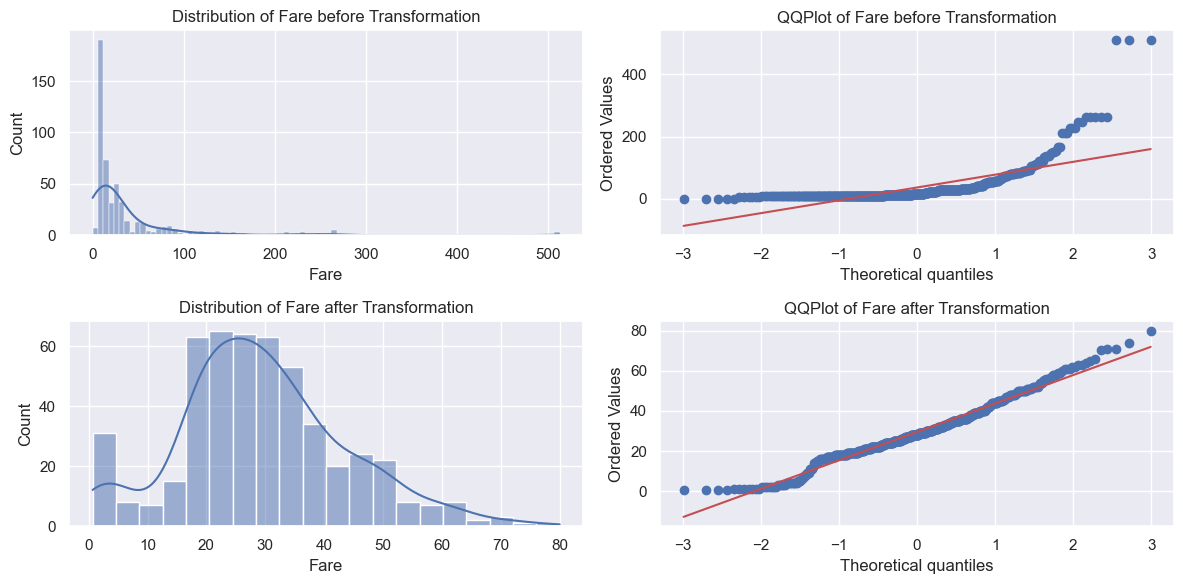

In [90]:
# For Fare Column with log transform
# Note : log1p is used here because log doesn't work with values close to 0 but log1p can handle them
apply_transform(lambda x : np.log1p(x), "Fare")